In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-56.000, high=80.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

741

In [6]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | broken hill
Processing Record 5 of Set 1 | nong chik
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | terney
Processing Record 9 of Set 1 | bandarbeyla
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | thomaston
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | henties bay
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | amapa
Processing Record 19 of Set 1 | liverpool
Processing Record 20 of Set 1 | bac lieu
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | waipawa
Processing Record 

Processing Record 36 of Set 4 | kenora
Processing Record 37 of Set 4 | troitsk
Processing Record 38 of Set 4 | avera
Processing Record 39 of Set 4 | labuhan
Processing Record 40 of Set 4 | ikom
Processing Record 41 of Set 4 | ludvika
Processing Record 42 of Set 4 | praia
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | tokzar
City not found. Skipping...
Processing Record 46 of Set 4 | rio branco
Processing Record 47 of Set 4 | acarau
Processing Record 48 of Set 4 | peace river
Processing Record 49 of Set 4 | sikasso
Processing Record 50 of Set 4 | zhanaozen
Processing Record 1 of Set 5 | tarudant
City not found. Skipping...
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | kidal
Processing Record 4 of Set 5 | arlit
Processing Record 5 of Set 5 | cururupu
Processing Record 6 of Set 5 | lokosovo
Processing Record 7 of Set 5 | bredasdorp
Processing Record 8 of Set 5 | grand river south east
City not fou

City not found. Skipping...
Processing Record 22 of Set 8 | tigil
Processing Record 23 of Set 8 | alice springs
Processing Record 24 of Set 8 | hay river
Processing Record 25 of Set 8 | sao filipe
Processing Record 26 of Set 8 | tuatapere
Processing Record 27 of Set 8 | ijaki
City not found. Skipping...
Processing Record 28 of Set 8 | yulara
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | tuy hoa
Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | honiara
Processing Record 34 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 35 of Set 8 | jutai
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | geraldton
Processing Record 38 of Set 8 | boguchany
Processing Record 39 of Set 8 | katsuura
Processing Record 40 of Set 8 | bethel
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | crisan
Processing Record 43

Processing Record 8 of Set 12 | iquitos
Processing Record 9 of Set 12 | caraz
Processing Record 10 of Set 12 | srandakan
Processing Record 11 of Set 12 | ust-kuyga
Processing Record 12 of Set 12 | sassandra
Processing Record 13 of Set 12 | mehamn
Processing Record 14 of Set 12 | rocha
Processing Record 15 of Set 12 | male
Processing Record 16 of Set 12 | amurzet
Processing Record 17 of Set 12 | karamea
City not found. Skipping...
Processing Record 18 of Set 12 | roberto payan
City not found. Skipping...
Processing Record 19 of Set 12 | vila velha
Processing Record 20 of Set 12 | manado
Processing Record 21 of Set 12 | dien bien
City not found. Skipping...
Processing Record 22 of Set 12 | haines junction
Processing Record 23 of Set 12 | mahon
Processing Record 24 of Set 12 | ukiah
Processing Record 25 of Set 12 | samarkand
Processing Record 26 of Set 12 | borogontsy
Processing Record 27 of Set 12 | redlands
Processing Record 28 of Set 12 | kabalo
Processing Record 29 of Set 12 | rundu
P

-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
len(city_data)

670

In [8]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charters Towers,-20.10,146.27,85.15,59,100,16.13,AU,2020-12-25 05:53:28
1,Mataura,-46.19,168.86,57.00,60,99,11.99,NZ,2020-12-25 05:53:28
2,Hasaki,35.73,140.83,53.60,37,75,3.36,JP,2020-12-25 05:53:28
3,Broken Hill,-31.95,141.43,84.20,18,0,12.75,AU,2020-12-25 05:53:29
4,Nong Chik,6.84,101.18,83.01,80,53,8.95,TH,2020-12-25 05:53:29
5,Cape Town,-33.93,18.42,73.00,82,20,1.12,ZA,2020-12-25 05:52:51
6,Butaritari,3.07,172.79,80.42,76,85,15.32,KI,2020-12-25 05:53:30
7,Terney,45.05,136.61,14.25,77,58,14.63,RU,2020-12-25 05:53:30
8,Bandarbeyla,9.49,50.81,75.04,69,7,21.50,SO,2020-12-25 05:53:30
9,Vila Franca Do Campo,37.72,-25.43,53.60,76,40,16.11,PT,2020-12-25 05:53:31


In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Charters Towers,AU,2020-12-25 05:53:28,-20.10,146.27,85.15,59,100,16.13
1,Mataura,NZ,2020-12-25 05:53:28,-46.19,168.86,57.00,60,99,11.99
2,Hasaki,JP,2020-12-25 05:53:28,35.73,140.83,53.60,37,75,3.36
3,Broken Hill,AU,2020-12-25 05:53:29,-31.95,141.43,84.20,18,0,12.75
4,Nong Chik,TH,2020-12-25 05:53:29,6.84,101.18,83.01,80,53,8.95
5,Cape Town,ZA,2020-12-25 05:52:51,-33.93,18.42,73.00,82,20,1.12
6,Butaritari,KI,2020-12-25 05:53:30,3.07,172.79,80.42,76,85,15.32
7,Terney,RU,2020-12-25 05:53:30,45.05,136.61,14.25,77,58,14.63
8,Bandarbeyla,SO,2020-12-25 05:53:30,9.49,50.81,75.04,69,7,21.50
9,Vila Franca Do Campo,PT,2020-12-25 05:53:31,37.72,-25.43,53.60,76,40,16.11


In [10]:
# Create output CSV
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Import time module
import time
# Get today's date in seconds
today = time.time()
today

1608875842.456536

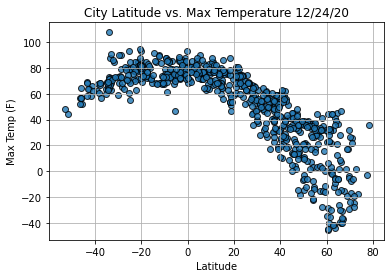

In [12]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

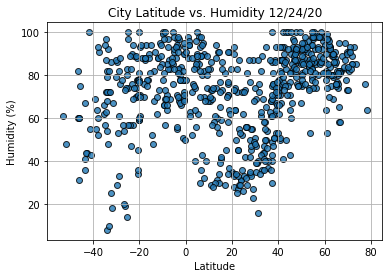

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

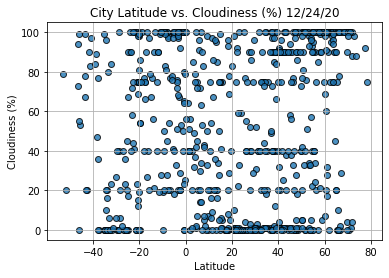

In [14]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

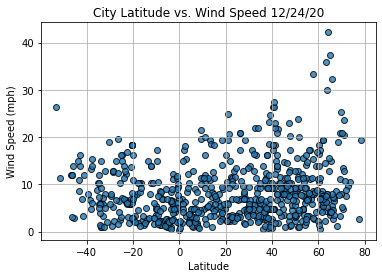

In [15]:
# Build the scatter plot for lat. vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress
import textwrap

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")

In [17]:
index13 = city_data_df.loc[13]
index13

City                       Avarua
Country                        CK
Date          2020-12-25 05:53:32
Lat                        -21.21
Lng                       -159.78
Max Temp                     78.8
Humidity                       78
Cloudiness                     23
Wind Speed                   5.82
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hasaki,JP,2020-12-25 05:53:28,35.73,140.83,53.60,37,75,3.36
4,Nong Chik,TH,2020-12-25 05:53:29,6.84,101.18,83.01,80,53,8.95
6,Butaritari,KI,2020-12-25 05:53:30,3.07,172.79,80.42,76,85,15.32
7,Terney,RU,2020-12-25 05:53:30,45.05,136.61,14.25,77,58,14.63
8,Bandarbeyla,SO,2020-12-25 05:53:30,9.49,50.81,75.04,69,7,21.50


In [19]:
# Create dataframes for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [20]:
len(northern_hemi_df)

467

In [21]:
len(southern_hemi_df)

203

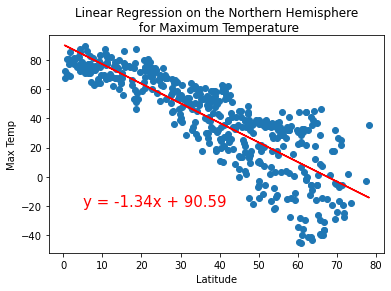

The p-value is: 0.000
The r-value is: -0.835


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))


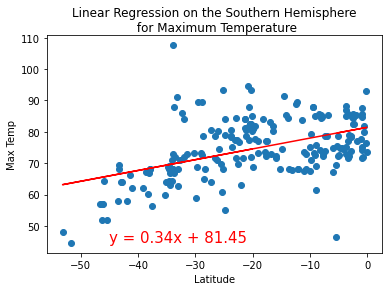

The p-value is: 0.000
The r-value is: 0.475


In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

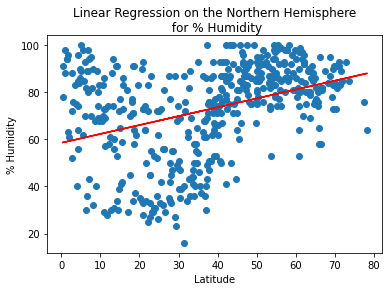

The p-value is: 0.000
The r-value is: 0.374


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

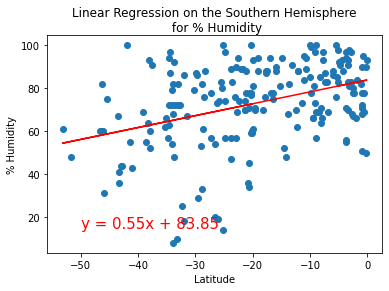

The p-value is: 0.000
The r-value is: 0.385


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

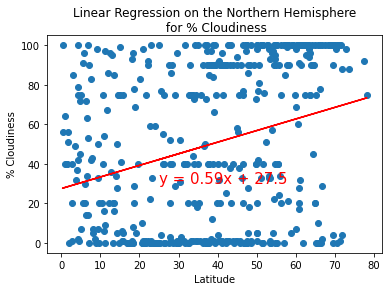

The p-value is: 0.000
The r-value is: 0.289


In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

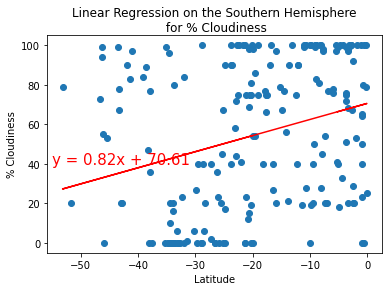

The p-value is: 0.000
The r-value is: 0.290


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

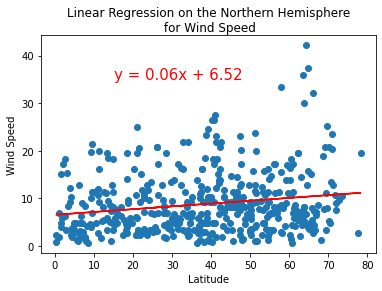

The p-value is: 0.000
The r-value is: 0.181


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

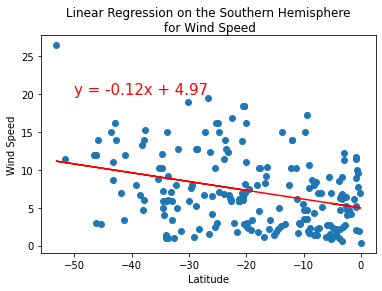

The p-value is: 0.000
The r-value is: -0.316


In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))